In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
#drop month,day and year
df.drop(['month','day','year'],axis=1,inplace=True)

KeyError: "['month', 'day', 'year'] not found in axis"

In [9]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [10]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [11]:
#encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [12]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [16]:
##independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [18]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [19]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [20]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
#feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.640179,-0.295442,-0.303129,0.682819,0.495974,0.399434,0.608042,0.474804,0.528734,0.238873
RH,-0.640179,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,-0.443073,-0.394121
Ws,-0.295442,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,-0.062718,-0.182236
Rain,-0.303129,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,-0.367767,-0.051964
FFMC,0.682819,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,0.781730,0.251710
DMC,0.495974,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,0.619536,0.210853
DC,0.399434,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,0.551208,-0.056844
ISI,0.608042,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,0.737184,0.290294
BUI,0.474804,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,0.616406,0.115434
Classes,0.528734,-0.443073,-0.062718,-0.367767,0.781730,0.619536,0.551208,0.737184,0.616406,1.000000,0.177257


<Axes: >

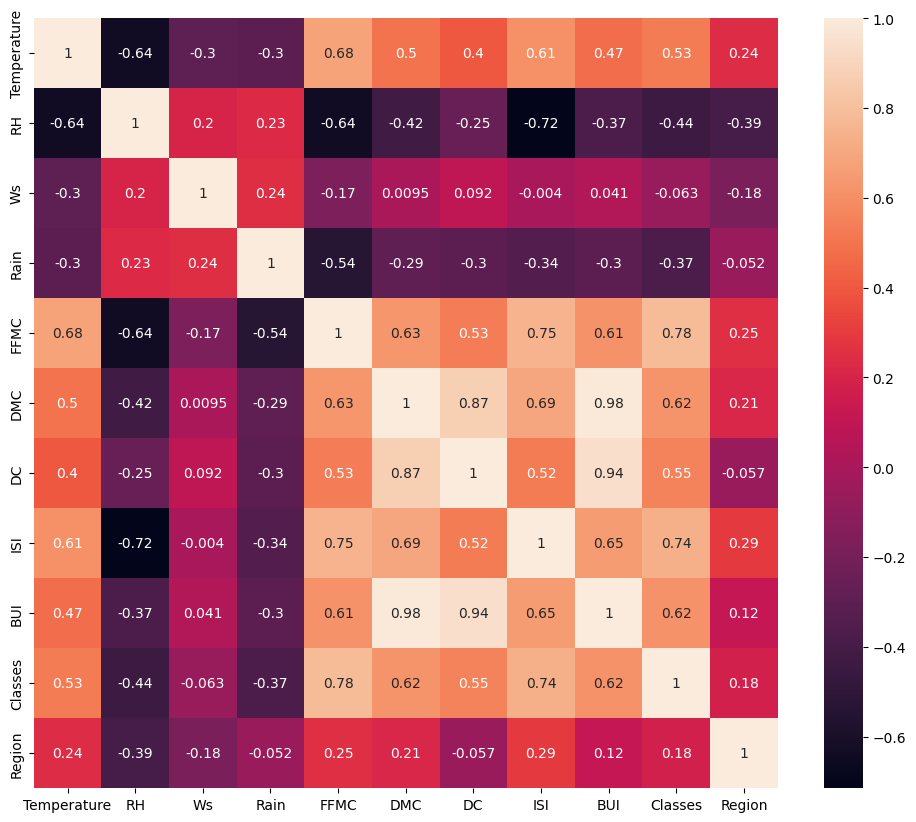

In [24]:
#check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [25]:
def correlation(dataset,threshold):
    col_corr=set() #set of all names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
#threshold-- Domain expertise
cor_feature=correlation(X_train,0.85)

In [34]:
#drop feature when correlation is above 0.85
X_train.drop(cor_feature,axis=1,inplace=True)
X_test.drop(cor_feature,axis=1,inplace=True)

In [36]:
X_train.shape,X_test.shape

((170, 9), (73, 9))

In [37]:
#feature selection or standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [38]:
X_train_scaled

array([[ 0.26131696, -0.86261203, -0.59170487, ...,  0.57277215,
         0.90992142, -1.        ],
       [-1.64645715,  1.16565969,  0.17323679, ..., -1.03570698,
        -1.098996  , -1.        ],
       [-0.0112222 , -0.5921758 , -1.73911734, ..., -0.82590535,
        -1.098996  , -1.        ],
       ...,
       [-1.91899631,  0.89522346,  0.55570761, ..., -1.05901827,
        -1.098996  , -1.        ],
       [ 0.53385612, -0.25413052,  0.17323679, ...,  0.61939473,
         0.90992142,  1.        ],
       [-0.55630052,  0.96283252,  2.08559091, ..., -0.84921665,
        -1.098996  , -1.        ]])

Text(0.5, 1.0, 'After Scaling')

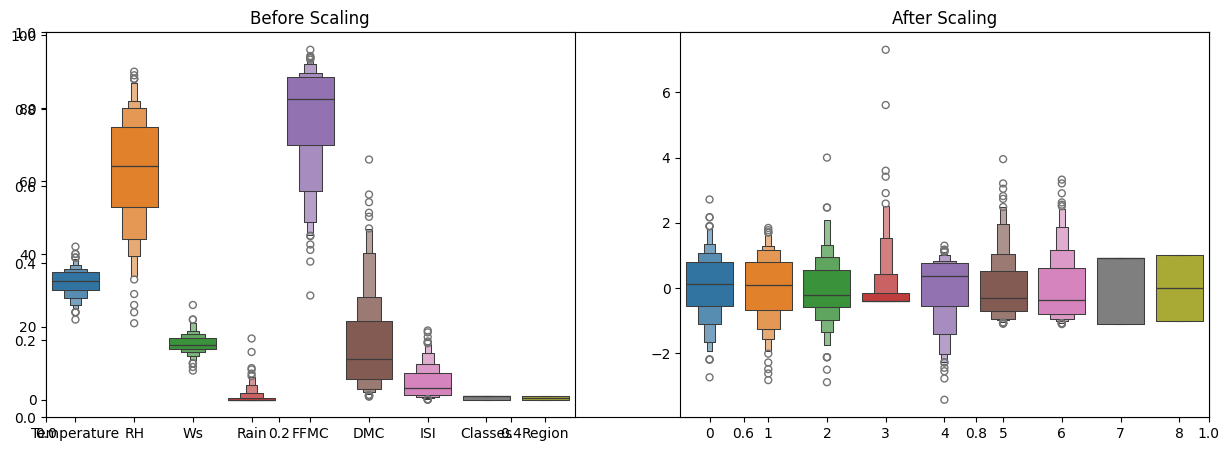

In [39]:
## box plot to understand effect of standard scaler

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxenplot(data=X_train)
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.boxenplot(data=X_train_scaled)
plt.title('After Scaling')